In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


In [6]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Inspect Database

In [9]:
from sqlalchemy import inspect
inspector = inspect(engine)

In [10]:
inspector.get_table_names()

['measurement', 'station']

In [11]:
columns = inspector.get_columns('measurement')
for column in columns:
    primarykey = ""
    if column['primary_key'] == 1:
        primarykey = "Primary Key"
    print(column["name"],column["type"],primarykey)

id INTEGER Primary Key
station TEXT 
date TEXT 
prcp FLOAT 
tobs FLOAT 


In [12]:
columns = inspector.get_columns('station')
for column in columns:
    primarykey = ""
    if column['primary_key'] == 1:
        primarykey = "Primary Key"
    print(column["name"],column["type"],primarykey)

id INTEGER Primary Key
station TEXT 
name TEXT 
latitude FLOAT 
longitude FLOAT 
elevation FLOAT 


# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
latest = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f"Latest: {latest[0]}")

Latest: 2017-08-23


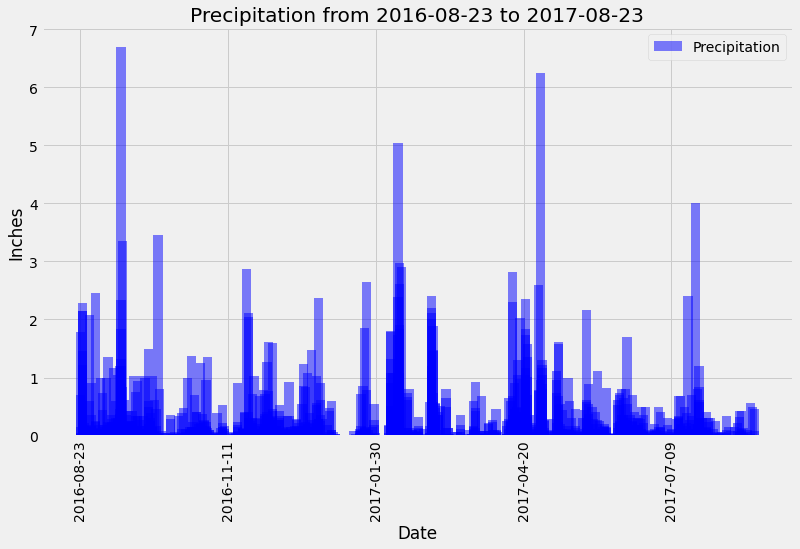

In [24]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
latest_date = dt.datetime.strptime(latest[0], '%Y-%m-%d')

# Calculate the date one year from the last date in data set.
year_from_latest = dt.date(latest_date.year  -1, latest_date.month, latest_date.day)
year_from_latest

# Perform a query to retrieve the data and precipitation scores
precipitation = [Measurement.date,Measurement.prcp]
result = session.query(*precipitation).filter(Measurement.date >= year_from_latest).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_results = pd.DataFrame(result, columns=['Date','Precipitation'])
prcp_results = prcp_results.dropna(how='any') # drop non value entries
prcp_results = prcp_results.set_index('Date')
# Sort the dataframe by date
prcp_results = prcp_results.sort_values(['Date'], ascending=True)
prcp_results.head()

# Use Pandas Plotting with Matplotlib to plot the data
xx = prcp_results.index.tolist()
yy = prcp_results['Precipitation'].tolist()

# x_axis = np.arange(len(prcp_results))

plt.figure(figsize=(12,7))
plt.bar(xx,yy,width = 5 ,color='b', alpha=0.5, align="center",label='Precipitation')

plt.tick_params(
    axis='x',         
    which='both',      
    bottom=True,      
    labelbottom=True) 
major_ticks = np.arange(0,400,80)
plt.xticks(major_ticks)

# tick_locations = [value for value in x_axis]
# plt.xticks(tick_locations, prcp_results.index.values)
plt.xticks(rotation="vertical")

plt.title(f"Precipitation from {year_from_latest} to {latest[0]}")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.grid(which='major', axis='both', linestyle='-')
plt.legend()
plt.show()



In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()